# 1. 모듈/라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

import string
import gensim
import gensim.downloader as api
from tqdm import tqdm

# 2. 탐색적 데이터 분석(EDA)

In [2]:
df_netflix = pd.read_csv('Datasets/netflix_titles.csv')

In [3]:
df_netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [4]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


## 2-1. 영화와 TV 프로그램 비교

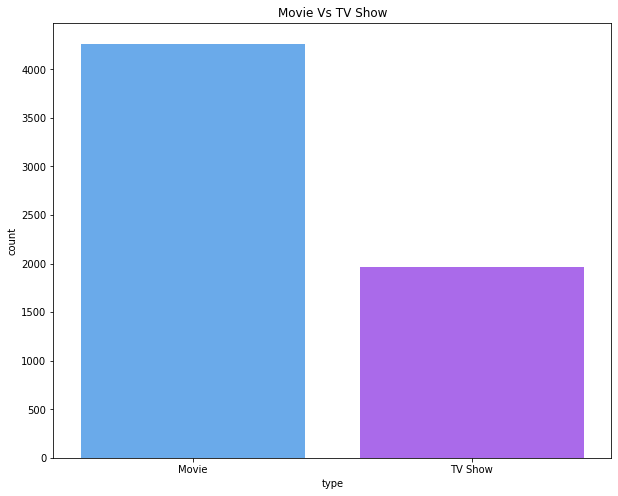

In [5]:
plt.figure(figsize=(10,8))
plt.title('Movie Vs TV Show')
ax = sns.countplot(x='type', data=df_netflix, palette='cool')

## 2-2. 나라별 작품 수

In [6]:
import itertools
list_country = [x.split(', ') for x in df_netflix.dropna(subset=['country'])['country'].tolist()]
list_country = list(itertools.chain(*list_country))

from collections import Counter
df_netflix_country_count = pd.DataFrame(Counter(list_country).most_common()[:10], columns=['Country', 'Count'])

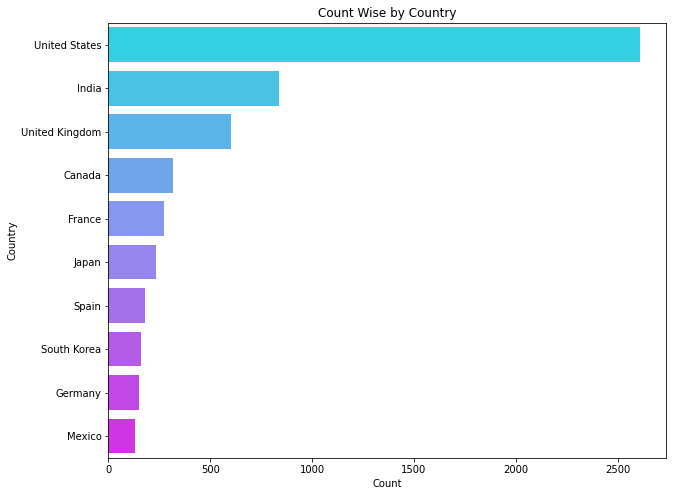

In [7]:
plt.figure(figsize=(10,8))
plt.title('Count Wise by Country')
ax = sns.barplot(y="Country", x='Count', data=df_netflix_country_count, palette="cool", orient='h')

## 2-3. 연도별 작품 수

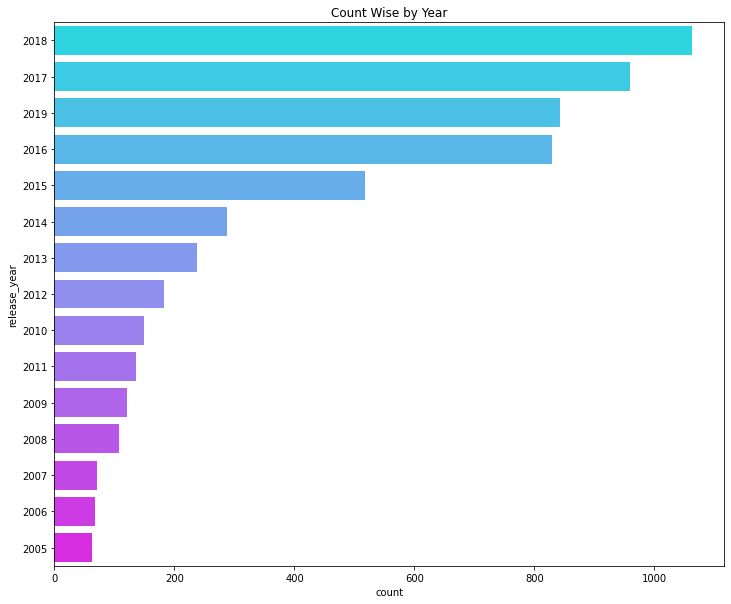

In [8]:
plt.figure(figsize=(12,10))
plt.title('Count Wise by Year')
ax = sns.countplot(y='release_year', data=df_netflix, palette="cool", order=df_netflix['release_year'].value_counts().index[0:15])

# 3. 데이터 전처리

## 3-1. 일련번호, 제목, 장르, 설명 외 다른 칼럼 삭제

In [9]:
df_netflix.drop(columns=['director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'type'], inplace=True)
df_netflix.head()

show_id                                    title  \
0  81145628  Norm of the North: King Sized Adventure   
1  80117401               Jandino: Whatever it Takes   
2  70234439                       Transformers Prime   
3  80058654         Transformers: Robots in Disguise   
4  80125979                             #realityhigh   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   
2                            Kids' TV   
3                            Kids' TV   
4                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

## 3-2. 문장부호 및 불용어 삭제

In [10]:
df_netflix['description'][1]

'Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of "Sex on Fire" in his comedy show.'

In [11]:
# 소문자 통일
df_netflix['title_list'] = df_netflix['title'].str.lower()
df_netflix['listed_in'] = df_netflix['listed_in'].str.lower()
df_netflix['description'] = df_netflix['description'].str.lower()

In [12]:
df_netflix['description'][1]

'jandino asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of "sex on fire" in his comedy show.'

In [13]:
# 단어 토큰화
df_netflix['title_list'] = df_netflix['title_list'].apply(word_tokenize)
df_netflix['listed_in'] = df_netflix['listed_in'].apply(word_tokenize)
df_netflix['description'] = df_netflix['description'].apply(word_tokenize)

In [14]:
df_netflix['description'][1]

['jandino',
 'asporaat',
 'riffs',
 'on',
 'the',
 'challenges',
 'of',
 'raising',
 'kids',
 'and',
 'serenades',
 'the',
 'audience',
 'with',
 'a',
 'rousing',
 'rendition',
 'of',
 '``',
 'sex',
 'on',
 'fire',
 "''",
 'in',
 'his',
 'comedy',
 'show',
 '.']

In [15]:
# 불용어 처리
list_stopwords = set(stopwords.words('english') + list(punctuation))
df_netflix['title_list'] = df_netflix['title_list'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_netflix['listed_in'] = df_netflix['listed_in'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_netflix['description'] = df_netflix['description'].apply(lambda x: [word for word in x if word not in list_stopwords])

In [16]:
df_netflix['description'][1]

['jandino',
 'asporaat',
 'riffs',
 'challenges',
 'raising',
 'kids',
 'serenades',
 'audience',
 'rousing',
 'rendition',
 '``',
 'sex',
 'fire',
 "''",
 'comedy',
 'show']

In [17]:
# 문장부호 제거
df_netflix['description'] = df_netflix['description'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_netflix['description'] = df_netflix['description'].apply(lambda x : [word for word in x if len(word) > 0])

In [18]:
df_netflix['description'][1]

['jandino',
 'asporaat',
 'riffs',
 'challenges',
 'raising',
 'kids',
 'serenades',
 'audience',
 'rousing',
 'rendition',
 'sex',
 'fire',
 'comedy',
 'show']

In [19]:
# 중복값 제거
df_netflix['title_list'] = df_netflix['title_list'].apply(lambda x : list(set(x)))
df_netflix['listed_in'] = df_netflix['listed_in'].apply(lambda x : list(set(x)))
df_netflix['description'] = df_netflix['description'].apply(lambda x : list(set(x)))

In [20]:
df_netflix['description'][1]

['challenges',
 'audience',
 'kids',
 'serenades',
 'rendition',
 'fire',
 'jandino',
 'riffs',
 'rousing',
 'comedy',
 'show',
 'sex',
 'raising',
 'asporaat']

In [21]:
df_netflix.head()

show_id                                    title  \
0  81145628  Norm of the North: King Sized Adventure   
1  80117401               Jandino: Whatever it Takes   
2  70234439                       Transformers Prime   
3  80058654         Transformers: Robots in Disguise   
4  80125979                             #realityhigh   

                              listed_in  \
0  [children, movies, comedies, family]   
1                    [stand-up, comedy]   
2                            [tv, kids]   
3                            [tv, kids]   
4                            [comedies]   

                                         description  \
0  [planning, polar, bear, artifact, wedding, tak...   
1  [challenges, audience, kids, serenades, rendit...   
2  [decepticons, allies, protect, earth, help, on...   
3  [decepticons, prison, crash, protect, new, ear...   
4  [finally, hairs, lands, celebrity, high, ex, s...   

                              title_list  
0  [north, sized, adventure, norm, king]  
1             [takes, jandino, whatever]  
2                  [transformers, prime]  
3       [robots, transformers, disguise]  
4                          [realityhigh]

# 4. Word2Vec 모델 불러오기

In [22]:
wv = api.load('word2vec-google-news-300')

# 5. 장르, 설명, 제목을 이용하여 유사한 작품 찾기

In [23]:
matrix_netflix_vocab = []

# 토큰화된 장르, 설명, 제목 단어들이 WV에 있다면 추가
for list_ in df_netflix.to_numpy():
    list_[2] = [word for word in list_[2] if word in wv]
    list_[3] = [word for word in list_[3] if word in wv]
    list_[4] = [word for word in list_[4] if word in wv]
    matrix_netflix_vocab.append(list_)
df_netflix_vocab = pd.DataFrame(matrix_netflix_vocab, columns=df_netflix.columns)

In [24]:
df_netflix_vocab.head()

show_id                                    title  \
0  81145628  Norm of the North: King Sized Adventure   
1  80117401               Jandino: Whatever it Takes   
2  70234439                       Transformers Prime   
3  80058654         Transformers: Robots in Disguise   
4  80125979                             #realityhigh   

                              listed_in  \
0  [children, movies, comedies, family]   
1                              [comedy]   
2                            [tv, kids]   
3                            [tv, kids]   
4                            [comedies]   

                                         description  \
0  [planning, polar, bear, artifact, wedding, tak...   
1  [challenges, audience, kids, serenades, rendit...   
2  [decepticons, allies, protect, earth, help, on...   
3  [decepticons, prison, crash, protect, new, ear...   
4  [finally, hairs, lands, celebrity, high, ex, s...   

                              title_list  
0  [north, sized, adventure, norm, king]  
1                      [takes, whatever]  
2                  [transformers, prime]  
3       [robots, transformers, disguise]  
4                                     []

In [25]:
def recommendation(title):
    matrix_netflix_title_vocab = []
    for list_ in df_netflix[df_netflix['title'] == title].to_numpy():
        list_[2] = [word for word in list_[2] if word in wv]
        list_[3] = [word for word in list_[3] if word in wv]
        list_[4] = [word for word in list_[4] if word in wv]
        matrix_netflix_title_vocab.append(list_)

    matrix_similarity = []
    pbar = tqdm(matrix_netflix_vocab)
    for list1 in pbar:
        for list2 in matrix_netflix_title_vocab:
            score_catg = wv.n_similarity(list1[2], list2[2]) # 장르 유사도 계산
            score_desc = wv.n_similarity(list1[3], list2[3]) # 설명 유사도 계산
            try:
                score_title = wv.n_similarity(list1[4], list2[4])/2
            except:
                score_title = 0
            if ((list1[1] != list2[1]) & (score_catg > 0.85)):
                matrix_similarity.append([list1[1], list2[1], score_title, score_catg, score_desc])
        pbar.update()
    pbar.close()
    df_netflix_similarity = pd.DataFrame(matrix_similarity, columns = ['recommendation','title','score_title', 'score_category', 'score_description'])
    df_netflix_similarity['final_score'] = df_netflix_similarity['score_title'] + df_netflix_similarity['score_category'] + df_netflix_similarity['score_description']
    return (df_netflix_similarity.sort_values(by=['final_score', 'score_category', 'score_description', 'score_title'], ascending=False).head(10))

In [26]:
recommendation('Avengers: Infinity War')

100%|██████████| 6234/6234 [00:01<00:00, 5016.47it/s] 


recommendation                   title  score_title  \
141                  Doom: Annihilation  Avengers: Infinity War     0.210455   
111                Terminator Salvation  Avengers: Infinity War     0.214154   
89                           Occupation  Avengers: Infinity War     0.172816   
172       Oh No! It's an Alien Invasion  Avengers: Infinity War     0.283219   
64                             Hulk Vs.  Avengers: Infinity War     0.118704   
86                      The Book of Eli  Avengers: Infinity War     0.131509   
110  Terminator 3: Rise of the Machines  Avengers: Infinity War     0.184206   
27                            Supergirl  Avengers: Infinity War     0.153653   
161                       Alien Warfare  Avengers: Infinity War     0.265108   
16       Scorpion King 5: Book of Souls  Avengers: Infinity War     0.197633   

     score_category  score_description  final_score  
141        0.883960           0.699530     1.793944  
111        1.000000           0.555739     1.769893  
89         1.000000           0.583606     1.756422  
172        0.860369           0.605135     1.748722  
64         1.000000           0.628452     1.747156  
86         1.000000           0.614370     1.745879  
110        1.000000           0.559653     1.743859  
27         1.000000           0.589266     1.742918  
161        1.000000           0.458889     1.723997  
16         1.000000           0.516952     1.714585

In [27]:
recommendation('Black Panther')

100%|██████████| 6234/6234 [00:01<00:00, 5216.69it/s] 


recommendation          title  score_title  score_category  \
26                  Supergirl  Black Panther     0.116688        1.000000   
156       Clash of the Titans  Black Panther     0.047077        1.000000   
54    Halo: The Fall of Reach  Black Panther     0.052581        1.000000   
116                   Chappie  Black Panther     0.112706        1.000000   
20   Illang: The Wolf Brigade  Black Panther     0.219760        0.902778   
19               Men in Black  Black Panther     0.297452        0.885755   
173  DC's Legends of Tomorrow  Black Panther     0.086030        0.909350   
27           Superman Returns  Black Panther     0.090467        1.000000   
163       Season of the Witch  Black Panther     0.126985        1.000000   
157         Jupiter Ascending  Black Panther     0.083517        1.000000   

     score_description  final_score  
26            0.621391     1.738079  
156           0.674041     1.721117  
54            0.655358     1.707939  
116           0.579021     1.691727  
20            0.566434     1.688972  
19            0.503077     1.686284  
173           0.689813     1.685193  
27            0.593951     1.684418  
163           0.556901     1.683886  
157           0.598604     1.682121

In [28]:
recommendation('Friends')

100%|██████████| 6234/6234 [00:01<00:00, 5194.95it/s] 


recommendation    title  score_title  score_category  \
55         Toast of London  Friends     0.112076        0.924088   
29          Family Reunion  Friends     0.288784        0.853450   
75                Episodes  Friends     0.040227        1.000000   
67              Dad's Army  Friends     0.177361        0.924088   
80               Big Mouth  Friends     0.085473        0.853450   
51                Real Rob  Friends     0.090192        0.853450   
53               I'm Sorry  Friends     0.123332        0.853450   
60         F is for Family  Friends     0.199680        0.853450   
73  The Andy Griffith Show  Friends     0.031710        1.000000   
87                 Frasier  Friends     0.000000        1.000000   

    score_description  final_score  
55           0.686581     1.722745  
29           0.564787     1.707021  
75           0.644352     1.684579  
67           0.576079     1.677529  
80           0.722250     1.661173  
51           0.693652     1.637294  
53           0.657182     1.633965  
60           0.572685     1.625816  
73           0.590680     1.622389  
87           0.619905     1.619905